In [1]:
import pandas as pd
df=pd.read_csv("E:\Decodr\Case Study\Bike Sharing\Day.csv",index_col=0)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2]:
df.isna().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [4]:
df.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
df['season']=df['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'})

In [6]:
df['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [7]:
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [8]:
df['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [9]:
def object_map(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

df[['mnth']]=df[['mnth']].apply(object_map)

In [10]:
df['mnth'].value_counts()

Dec    62
Mar    62
Jan    62
Jul    62
Oct    62
Aug    62
May    62
Jun    60
Nov    60
Sep    60
Apr    60
Feb    56
Name: mnth, dtype: int64

In [11]:
def str_map(x):
    return x.map({0:'Tue',1:'Wed',2:'Thur',3:'Fri',4:'Sat',5:'Sun',6:'Mon'})

df[['weekday']]=df[['weekday']].apply(str_map)

In [12]:
df['weekday'].value_counts()

Tue     105
Wed     105
Mon     105
Sun     104
Sat     104
Thur    104
Fri     103
Name: weekday, dtype: int64

In [13]:
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [14]:
df.loc[(df['weathersit']==1),'weathersit']='A'
df.loc[(df['weathersit']==2),'weathersit']='B'
df.loc[(df['weathersit']==3),'weathersit']='C'

In [15]:
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,Jan,0,Mon,0,B,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,Jan,0,Tue,0,B,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,Jan,0,Wed,1,A,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,Jan,0,Thur,1,A,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,Jan,0,Fri,1,A,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,spring,1,Dec,0,Sat,1,B,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,spring,1,Dec,0,Sun,1,B,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,spring,1,Dec,0,Mon,0,B,10.386653,12.12000,75.2917,8.333661,159,1182,1341


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 91.2+ KB


In [17]:
import seaborn as sns

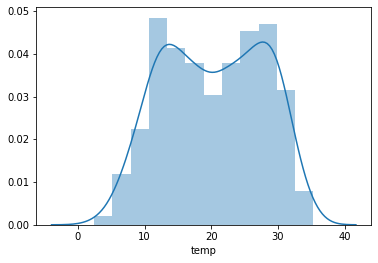

In [18]:
_=sns.distplot(df['temp'])

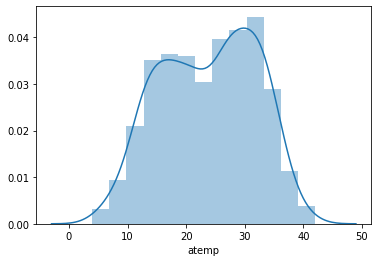

In [19]:
_=sns.distplot(df['atemp'])

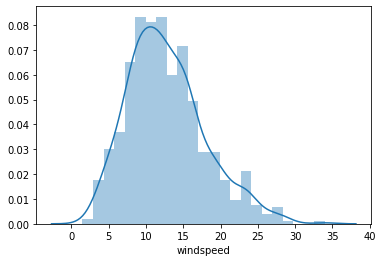

In [20]:
_=sns.distplot(df['windspeed'])

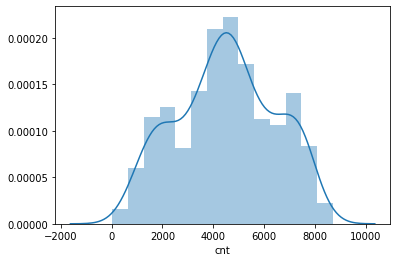

In [21]:
_=sns.distplot(df['cnt'])

In [22]:
df['dteday']=pd.to_datetime(df['dteday'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 91.2+ 

In [24]:
df_categorical=df.select_dtypes('object')
#or
#df_categorical=df[df.columns[(df.dtypes=='object').values]]

In [25]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   mnth        730 non-null    object
 2   weekday     730 non-null    object
 3   weathersit  730 non-null    object
dtypes: object(4)
memory usage: 28.5+ KB


In [26]:
import matplotlib.pyplot as plt

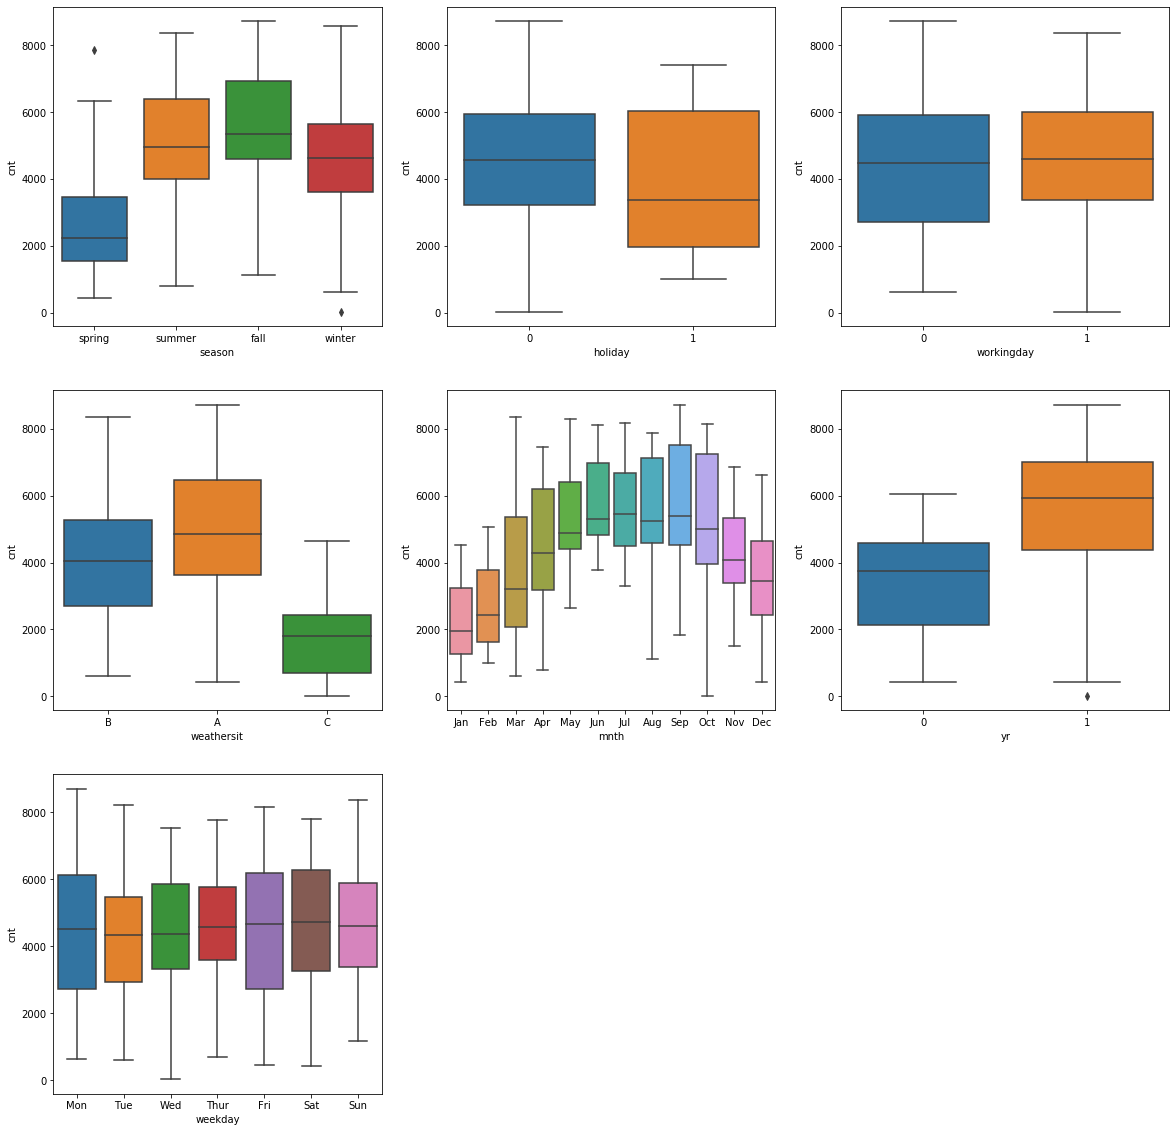

In [27]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.boxplot(x=df['season'],y=df['cnt'])
plt.subplot(3,3,2)
sns.boxplot('holiday','cnt', data=df)
plt.subplot(3,3,3)
sns.boxplot('workingday','cnt',data=df)
plt.subplot(3,3,4)
sns.boxplot('weathersit','cnt',data=df)
plt.subplot(3,3,5)
sns.boxplot('mnth','cnt',data=df)
plt.subplot(3,3,6)
sns.boxplot('yr','cnt',data=df)
plt.subplot(3,3,7)
sns.boxplot('weekday','cnt', data=df)
plt.show()


In [28]:
df_numeric=df.select_dtypes(['int64','float64'])

In [29]:
df_numeric.drop(['yr','holiday','workingday'],axis=1,inplace=True)

C:\Users\JERRY\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 111.2+

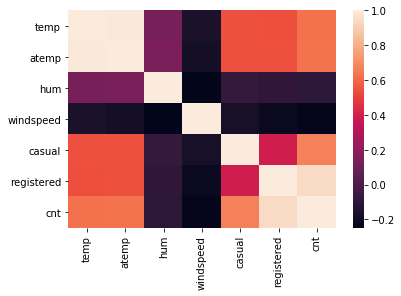

In [31]:
sns.heatmap(df_numeric.corr())
plt.show()

In [32]:
import numpy as np
mask=np.array(df_numeric.corr())

In [33]:
mask[np.tril_indices_from(mask)]=False

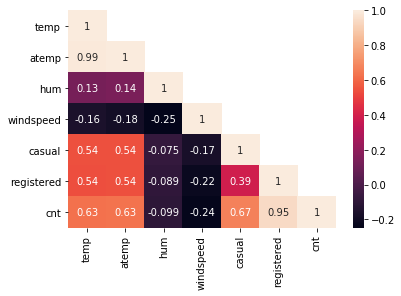

In [34]:
sns.heatmap(df_numeric.corr(),mask=mask,annot=True)
plt.show()

In [35]:
df.drop('atemp',axis=1,inplace=True)

In [36]:
df_dummies=pd.get_dummies(df_categorical,drop_first=True)

In [37]:
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df=df.drop(list(df_categorical.columns),axis=1)
df

,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,
1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331,654,985
2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131,670,801
3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120,1229,1349
4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108,1454,1562
5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...
726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247,1867,2114
727,2019-12-28,1,0,1,10.386653,59.0000,10.416557,644,2451,3095
728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159,1182,1341


In [39]:
df=pd.concat([df,df_dummies],axis=1)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dteday         730 non-null    datetime64[ns]
 1   yr             730 non-null    int64         
 2   holiday        730 non-null    int64         
 3   workingday     730 non-null    int64         
 4   temp           730 non-null    float64       
 5   hum            730 non-null    float64       
 6   windspeed      730 non-null    float64       
 7   casual         730 non-null    int64         
 8   registered     730 non-null    int64         
 9   cnt            730 non-null    int64         
 10  season_spring  730 non-null    uint8         
 11  season_summer  730 non-null    uint8         
 12  season_winter  730 non-null    uint8         
 13  mnth_Aug       730 non-null    uint8         
 14  mnth_Dec       730 non-null    uint8         
 15  mnth_Feb       730 non-

In [41]:
df.drop(['dteday'],axis=1,inplace=True)

In [42]:
df

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,80.5833,10.749882,331,654,985,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,14.902598,69.6087,16.652113,131,670,801,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.050924,43.7273,16.636703,120,1229,1349,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,8.200000,59.0435,10.739832,108,1454,1562,1,...,0,0,0,0,0,1,0,0,0,0
5,0,0,1,9.305237,43.6957,12.522300,82,1518,1600,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,1,10.420847,65.2917,23.458911,247,1867,2114,1,...,0,0,0,1,0,0,0,0,1,0
727,1,0,1,10.386653,59.0000,10.416557,644,2451,3095,1,...,0,0,0,0,1,0,0,0,1,0
728,1,0,0,10.386653,75.2917,8.333661,159,1182,1341,1,...,0,0,1,0,0,0,0,0,1,0


In [43]:
X=df.drop('cnt',axis=1)
y=df['cnt']

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
X_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
654,1,0,1,19.201653,55.8333,12.208807,922,6612,0,0,...,1,0,0,0,0,1,0,0,0,0
577,1,0,1,29.246653,70.4167,11.083475,968,6248,0,0,...,0,0,0,0,0,1,0,0,0,0
427,1,0,0,16.980847,62.1250,10.792293,956,3110,1,0,...,0,0,1,0,0,0,0,0,1,0
729,1,0,0,10.489153,48.3333,23.500518,364,1432,1,0,...,0,0,0,0,0,0,1,0,0,0
483,1,0,0,15.443347,48.9583,8.708325,1120,3100,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,1,0,1,30.852500,65.9583,8.666718,983,6278,0,0,...,0,0,0,1,0,0,0,0,0,0
54,0,0,1,9.091299,42.3043,6.305571,139,1778,1,0,...,0,0,0,0,0,0,0,0,0,0
351,0,0,0,10.591653,56.0833,16.292189,275,2464,0,0,...,0,0,1,0,0,0,0,0,1,0


In [47]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur',
       'weekday_Tue', 'weekday_Wed', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [48]:
scaler=MinMaxScaler()

In [49]:
X_train[['workingday', 'temp', 'hum', 'windspeed','casual', 'registered']]=scaler.fit_transform(X_train[['workingday', 'temp', 'hum', 'windspeed','casual', 'registered']])

C:\Users\JERRY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\JERRY\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [50]:
X_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
654,1,0,1.0,0.509887,0.575354,0.300794,0.280402,0.951776,0,0,...,1,0,0,0,0,1,0,0,0,0
577,1,0,1.0,0.815169,0.725633,0.264686,0.294422,0.899220,0,0,...,0,0,0,0,0,1,0,0,0,0
427,1,0,0.0,0.442393,0.640189,0.255342,0.290765,0.446145,1,0,...,0,0,1,0,0,0,0,0,1,0
729,1,0,0.0,0.245101,0.498067,0.663106,0.110332,0.203869,1,0,...,0,0,0,0,0,0,1,0,0,0
483,1,0,0.0,0.395666,0.504508,0.188475,0.340750,0.444701,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,1,0,1.0,0.863973,0.679690,0.187140,0.298994,0.903552,0,0,...,0,0,0,1,0,0,0,0,0,0
54,0,0,1.0,0.202618,0.435939,0.111379,0.041756,0.253826,1,0,...,0,0,0,0,0,0,0,0,0,0
351,0,0,0.0,0.248216,0.577930,0.431816,0.083206,0.352873,0,0,...,0,0,1,0,0,0,0,0,1,0


In [51]:
X_test[['workingday', 'temp', 'hum', 'windspeed','casual', 'registered']]=scaler.transform(X_test[['workingday', 'temp', 'hum', 'windspeed','casual', 'registered']])

C:\Users\JERRY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\JERRY\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [52]:
from sklearn.ensemble import GradientBoostingRegressor

In [53]:
model=GradientBoostingRegressor()

In [54]:
model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [55]:
model.score(X_test,y_test)

0.9955415473243575

In [56]:
model.score(X_train,y_train)

0.99902233796698

In [74]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
model.score(X_test,y_test)

1.0